In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
%matplotlib inline

# Data-driven Business and Behaviour Analytics (DBBA)
# Tutorial: 2 - Paths, directed paths and connected components

## Paths
By definition, a __path__ in an undirected network is a sequence of edges connecting two nodes. Let's see in a simple plot!

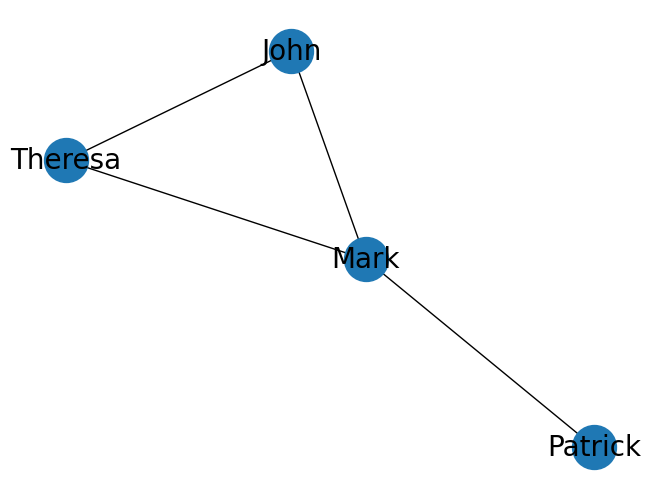

In [4]:
G = nx.Graph()

G.add_nodes_from(["Mark", "John", "Theresa", "Patrick"])

G.add_edges_from([("Mark","John"),("John","Theresa"),("Mark","Theresa"),("Mark","Patrick")])

nx.draw(G, with_labels=True,
        node_size=1000,
        font_size=20)

In [5]:
nx.has_path(G, "Mark", "Patrick") # we check that a path exists between Mark and Patrick

True

Generally speaking, the paths between nodes are not unique as we could cover the same links in cycle endlessly trying to reach the target node, that is why we are interested in more useful concepts. For instance, a __simple path__ is one without any cycles (i.e., paths that go from one node back to itself).

In [6]:
list(nx.all_simple_paths(G, "Theresa", "Patrick"))

[['Theresa', 'John', 'Mark', 'Patrick'], ['Theresa', 'Mark', 'Patrick']]

We have just seen that more than one simple path are possible between two nodes in our network. Often, it is of interest to compute or to consider the one consisting of the smallest number of edges. In a word, we want to compute the __shortest path__.

In [7]:
nx.shortest_path(G, "Theresa", "Patrick")

['Theresa', 'Mark', 'Patrick']

Instead, if we need its length only, we can use another function, `shortest_path_length()`. Note: in network science, the path length is defined as the number of links, not of the nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes ***u*** and ***v***.

In [8]:
nx.shortest_path_length(G, "Theresa", "Patrick")

2

## Connectedness



So far, we considered only networks in which any pair of nodes is connected by a path. Unsurprisingly, this kind of network is called __connected__ and NetworkX provides a method to check this property.

In [9]:
nx.is_connected(G)

True

It can happen that for two nodes in a network there is no path connecting them.

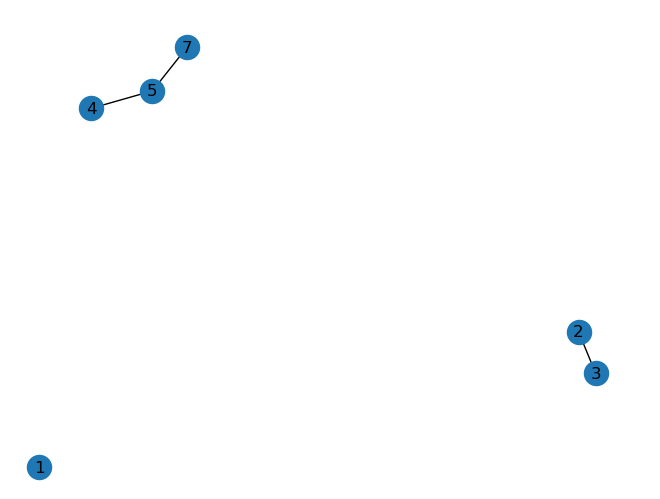

In [10]:
G_not_connected = nx.Graph()

G_not_connected.add_nodes_from((1,2,3, 7))
G_not_connected.add_edge(2,3)
G_not_connected.add_edge(4,5)
G_not_connected.add_edge(7,5)

nx.draw(G_not_connected, with_labels=True)

In [11]:
nx.is_connected(G_not_connected)

False

Because there is no unique component, we can investigate further the number and the structure of the different components.

In [12]:
nx.number_connected_components(G_not_connected)

3

In [16]:
components = list(nx.connected_components(G_not_connected))
for i in components:
    print(i, ", then with dimension:", len(i))

{1} , then with dimension: 1
{2, 3} , then with dimension: 2
{4, 5, 7} , then with dimension: 3


One of the most significative analysis is usually performed by taking into account the largest component. Now, we can use the `max()` function (which thanks to `key=len` sorts with respect to the length of the components) to get the component with the largest number of nodes.

In [18]:
largest_component = max(nx.connected_components(G_not_connected), key=len)
print(largest_component)

{4, 5, 7}


To better analyse the largest component, we can build a subgraph of the original network induced by the nodes from the first component.

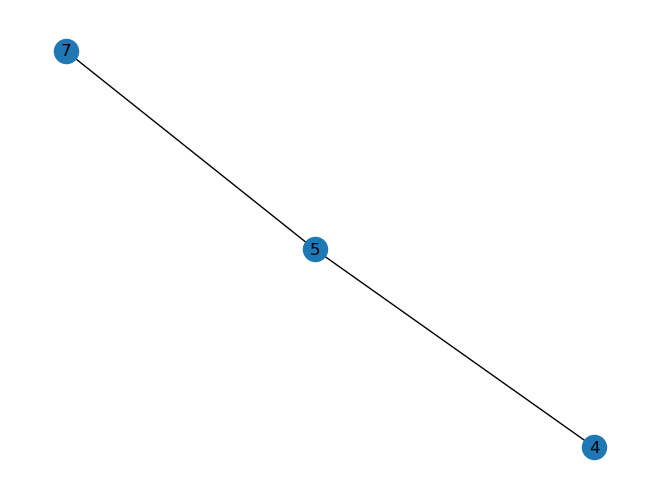

In [19]:
induced_subgraph = G_not_connected.subgraph(largest_component)

nx.draw(induced_subgraph, with_labels=True)

## Paths and components in directed networks

Likewise, we can operate in directed networks. Here the relationships are not symmetrical and therefore any kind of path must follow the forward direction.

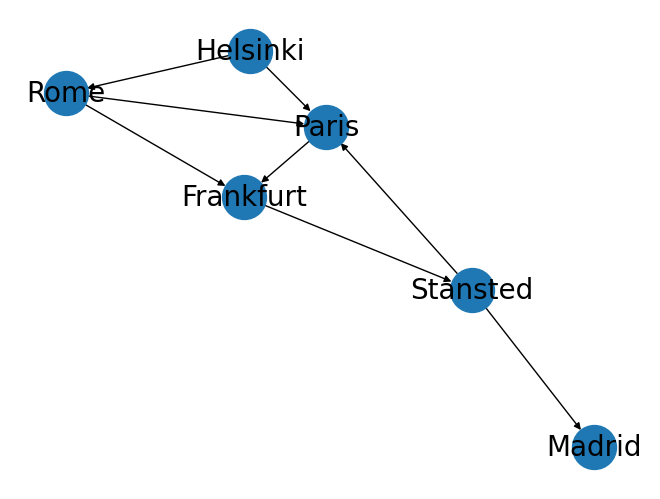

In [20]:
D = nx.DiGraph()

D.add_edges_from([
    ("Frankfurt","Stansted"),
    ("Stansted","Madrid"),
    ("Rome","Frankfurt"), ("Helsinki","Rome"), ("Stansted","Paris"),
    ("Rome","Paris"), ("Helsinki","Paris"), ("Paris","Frankfurt")
])

nx.draw(D, with_labels=True,         
        node_size=1000,
        font_size=20)

In [21]:
nx.has_path(D, "Paris", "Frankfurt")

True

In [22]:
nx.has_path(D, "Frankfurt", "Rome")

False

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [17]:
nx.shortest_path(D, "Frankfurt", "Rome")

NetworkXNoPath: No path between Frankfurt and Rome.

Moving from undirected network to __directed__ ones, the concept of connectivity becomes more sophisticated. The __strong__ version means that a directed path (i.e., a path following the edge directin) exists for any two nodes.

In [23]:
nx.is_strongly_connected(D)

False

Instead, the __weak connectivity__ considers any path between nodes, regardless of edge direction.

In [24]:
nx.is_weakly_connected(D)

True

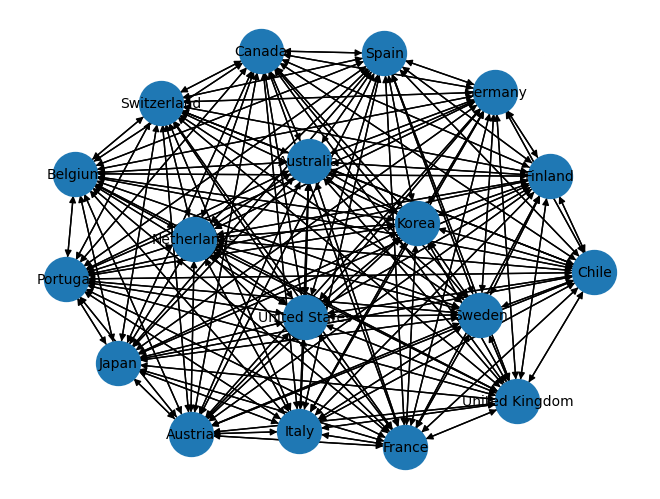

In [34]:
import networkx as nx
import pandas as pd
exposuredf=pd.read_csv('exposure_dataset.csv')
G = nx.from_pandas_edgelist(exposuredf, edge_attr='weight', create_using=nx.DiGraph())

pos = nx.spring_layout(G, weight = None)
nx.draw(G, pos, with_labels=True,         
        node_size=1000,
        font_size=10)

In [35]:
nx.is_weakly_connected(G)

True

# **EXERCISE 1**

The file "exposure_dataset.csv" contains data on the aggregated banking exposure between countries. The weights represent the amount of money that banks from a country loaned to banks from another country.

1.a Filter the network by removing edges whose weight is less than 1000. \
1.b Compute the density of the network. \
1.c Does there exist a path in the network between every possible pair of countries? \
1.d Repeat points 1.a, 1.b, and 1.c but this time remove all weights less than 100000. \
1.e Discuss these results.

Network density G: 0.7549019607843137
Is the graph G strongly connected? True
Network density G1: 0.1437908496732026
Is the graph G1 strongly connected? False


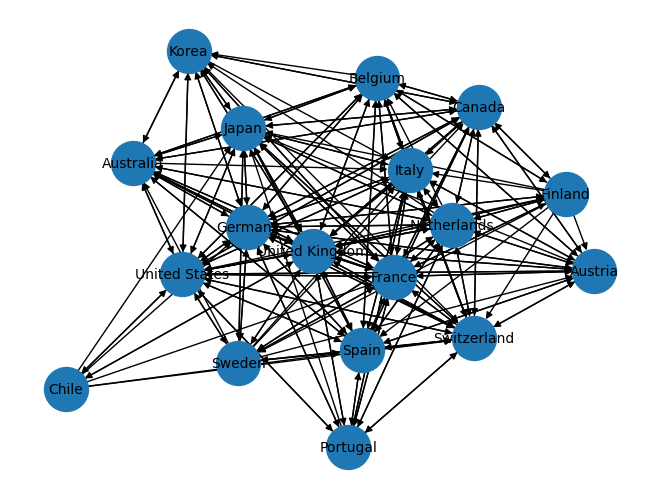

In [55]:
import networkx as nx
import pandas as pd
exposuredf=pd.read_csv('exposure_dataset.csv')
G = nx.from_pandas_edgelist(exposuredf, edge_attr='weight', create_using=nx.DiGraph())

# prepare for question 4
G1 = G.copy()

# 1. Remove all edges with weight < 1000
edges_less_than_1000 = [(u, v, d['weight']) for u, v, d in G.edges(data=True) if d['weight'] < 1000]
G.remove_edges_from(edges_less_than_1000)

# 2. Compute the density of the network
density = nx.density(G)
print("Network density G:", density)

# 3. Does there exist a path in the network between every possible pair of countries?
is_connected = nx.is_strongly_connected(G)
print("Is the graph G strongly connected?", is_connected)

# 4. remove all weights less than 100000.
edges_less_than_1000_g1 = [(u, v, d['weight']) for u, v, d in G1.edges(data=True) if d['weight'] < 100000]
G1.remove_edges_from(edges_less_than_1000_g1)


density1 = nx.density(G1)
print("Network density G1:", density1)
is_connected1 = nx.is_strongly_connected(G1)
print("Is the graph G1 strongly connected?", is_connected1)


pos = nx.spring_layout(G, weight = None)
nx.draw(G, pos, with_labels=True,         
        node_size=1000,
        font_size=10)


# **EXERCISE 2**

Answer the following questions:

2.a If you are heavily invested in Australian bonds, should you worry about the economic situation in Spain? \
2.b You want to invest in the Korean economy. Which countries should you closely monitor before doing so?

In [85]:

print(nx.has_path(G, target="Australia", source="Spain"))
print("so we should worry about the spain")
print("\n")
print(list(G.predecessors("Korea")))
print("so we should worry about this countries when you want to invest in Korea")



True
so we should worry about the spain


['Australia', 'Belgium', 'Canada', 'Germany', 'France', 'United Kingdom', 'Japan', 'Netherlands', 'United States']
so we should worry about the this countries when you want to invest in Korea
